<a href="https://colab.research.google.com/github/marcio-piagio/Aulas/blob/main/3_previsoes_arima_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pmdarima

In [2]:
# Importação das bibliotecas
import pandas as pd
import matplotlib.pylab as plt
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from datetime import datetime
#registro de converters para uso do matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [7]:
# Carregamento da base de dados, conversão do atributo para data e criação da série temporal (ts)
base = pd.read_csv('/AirPassengers.csv')
dateparse = lambda dates: datetime.strptime(dates, '%Y-%m')
base = pd.read_csv('/AirPassengers.csv', parse_dates = ['Month'],
                   index_col = 'Month', date_parser = dateparse)
ts = base['#Passengers']

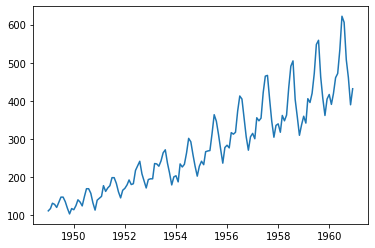

In [9]:
# Visualização da série temporal completa
plt.plot(ts)

In [11]:
# Criação do modelo ARIMA com os parâmetro p = 2, q = 1, d = 2, treinamento e visualização dos resultados
# Mais detalhes sobre o parâmetro freq: https://stackoverflow.com/questions/49547245/valuewarning-no-frequency-information-was-provided-so-inferred-frequency-ms-wi
modelo = ARIMA(ts, order=(2, 1, 2),freq=ts.index.inferred_freq) 
modelo_treinado = modelo.fit()
modelo_treinado.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:          D.#Passengers   No. Observations:                  143
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -666.022
Method:                       css-mle   S.D. of innovations             24.715
Date:                Sat, 18 Sep 2021   AIC                           1344.043
Time:                        07:23:54   BIC                           1361.820
Sample:                    02-01-1949   HQIC                          1351.267
                         - 12-01-1960                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   2.5310      0.708      3.573      0.000       1.143       3.919
ar.L1.D.#Passengers     1.6477      0.033     49.932      0.000       1.583       1.712
ar.L2.D.#Passengers    -0.9094      0.033    -27.878      0.000      -0.973      -0.845
ma.L1.D.#Passengers    -1.9097      0.065    -29.548      0.000      -2.036      -1.783
ma.L2.D.#Passengers     0.9996      0.067     14.828      0.000       0.867       1.132
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.9060           -0.5281j            1.0486           -0.0840
AR.2            0.9060           +0.5281j            1.0486            0.0840
MA.1            0.9553           -0.2965j            1.0002           -0.0479
MA.2            0.9553           +0.2965j            1.0002            0.0479
-----------------------------------------------------------------------------
"""

In [12]:
# Previsões de 12 datas no futuro
previsoes = modelo_treinado.forecast(steps = 12)[0]
previsoes

array([433.13109777, 450.91078088, 479.84039549, 512.00203509,
       539.34958541, 555.82571014, 558.76661386, 549.29154728,
       531.6671349 , 511.90575462, 496.03412877, 488.5150558 ])

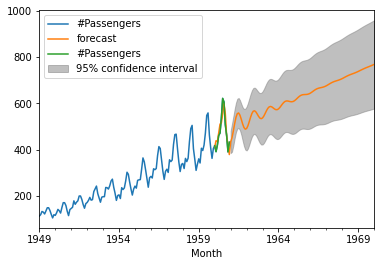

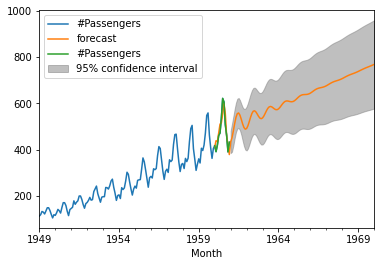

In [13]:
# Criação de eixo para a série temporal completa, com adição das previsões do modelo
#lot_insample = True dados originais
eixo = ts.plot()
modelo_treinado.plot_predict('1960-01-01', '1970-01-01',
                             ax = eixo, plot_insample = True)

In [14]:
# Implementação do auto arima para descoberta automática dos parâmetros
modelo_auto = auto_arima(ts, m = 12, seasonal = True, trace = False)
modelo_auto.summary()
# Warning abaixo são normais, de acordo com o link abaixo
#ConvergenceWarning: Maximum... https://github.com/statsmodels/statsmodels/issues/6157

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  144
Model:             SARIMAX(2, 1, 1)x(0, 1, [], 12)   Log Likelihood                -504.923
Date:                             Sat, 18 Sep 2021   AIC                           1017.847
Time:                                     07:24:18   BIC                           1029.348
Sample:                                          0   HQIC                          1022.520
                                             - 144                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5960      0.085      6.987      0.000       0.429       0.763
ar.L2          0.2143      0.091      2.343      0.019       0.035       0.394
ma.L1         -0.9819      0.038    -25.599      0.000      -1.057      -0.907
sigma2       129.3144     14.557      8.884      0.000     100.784     157.845
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 7.68
Prob(Q):                              0.98   Prob(JB):                         0.02
Heteroskedasticity (H):               2.33   Skew:                            -0.01
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [15]:
proximos_12 = modelo_auto.predict(n_periods = 12)
# Visualização dos próximos 12 valores
proximos_12 

array([445.6354001 , 420.39577137, 449.19934514, 491.84117289,
       503.39586262, 566.86396361, 654.26178957, 638.59918057,
       540.88549652, 494.12842405, 423.33454967, 465.50944575])